# <strong>The 20 newsgroups text dataset - Text classification with Logistic & SVMs</strong>

<b>Erickson Figueroa</b><br>
Data Science, Machine Learning & AI

<p>
The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.
</p>
<img src="https://raw.githubusercontent.com/erickson-figueroa/machine-learning-projects/main/Text%20Classification/The%2020%20newgroups%20text%20dataset.png" alt="The 20 newgroups text dataset" width="300" height="300" />

#### Understanding the Text Classification Project

<b>Overview</b>
<p>The project is focused on text classification using the 20 newsgroups dataset. This dataset is a collection of around 18,000 newsgroup posts, which are categorized into 20 different topics. The goal of the project is to build and evaluate models that can predict the topic of a given newsgroup post.</p>

<b>Key Steps in the Project</b>

1. <b>Data Preparation and Vectorization</b>
- <b>Dataset</b>: The 20 newsgroups dataset.
- <b>Vectorization</b>: Converting the text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency). This step transforms the text data into a format that machine learning algorithms can work with. Is an approach to rescale the frequency of words by how often they appear in all documents. This is also known as is a statistical measure that evaluates how important a word is to a document in a collection or corpus. It consists of two main components:

    1. <b>Term Frequency (TF)</b>: Measures the frequency of a term (word) in a document.
        TF for a term 𝑡 in a document 𝑑 is calculated as: <br><br>
       <img src="https://raw.githubusercontent.com/erickson-figueroa/machine-learning-projects/main/Text%20Classification/TF%20Formula.png" alt="Term Frequency (TF)" width="auto" height="auto"/> <br><br>
    2. <b>Inverse Document Frequency (IDF)</b>: Measures how important a term is across the entire corpus.
        IDF for a term 𝑡 is calculated as:   <br><br>
        <img src="https://raw.githubusercontent.com/erickson-figueroa/machine-learning-projects/main/Text%20Classification/IDF%20Formula.png" alt="Inverse Document Frequency (IDF)" width="auto" height="auto"/> <br><br>
2. <b>Model Training and Evaluation</b>
- <b>Models Used</b>: Logistic Regression and Support Vector Machines (SVM).
- <b>Training</b>: Fitting the models to the training data.
- <b>Evaluation</b>: Assessing the models on the test data using various metrics.
3. <b>Performance Comparison</b>
<b>Metrics</b>: Accuracy, precision, recall, F1-scores, and confusion matrix. Comparing the performance of Logistic Regression and SVM to determine which model performs better.

<b>What are we going to predict?</b>
<p>We are going to predict the topic category of newsgroup posts. The dataset consists of posts from 20 different topics, such as:</p>

1. 'alt.atheism'
2. 'comp.graphics'
3. 'comp.os.ms-windows.misc'
4. 'comp.sys.ibm.pc.hardware'
5. 'comp.sys.mac.hardware'
6. 'comp.windows.x'
7. 'misc.forsale'
8. 'rec.autos'
9. 'rec.motorcycles'
10. 'rec.sport.baseball'
11. 'rec.sport.hockey'
12. 'sci.crypt'
13. 'sci.electronics'
14. 'sci.med'
15. 'sci.space'
16. 'soc.religion.christian'
17. 'talk.politics.guns'
18. 'talk.politics.mideast'
19. 'talk.politics.misc'
20. 'talk.religion.misc'

Each newsgroup post in the dataset is labeled with one of these 20 topics. The models are trained to learn the patterns and features that distinguish these topics from each other.

<b>Detailed Predictions Example</b>:

"I recently upgraded my computer to a new graphics card and now my system crashes when I try to run certain applications. Has anyone else experienced this issue?"

The model might predict the topic 'comp.graphics' or 'comp.sys.ibm.pc.hardware' based on the content of the post.

<b>Evaluation Metrics</b>
- <b>Precision</b>: The ratio of true positive predictions to the total predicted positives for a class.
- <b>Recall</b>: The ratio of true positive predictions to the actual number of positives in the dataset for a class.
- <b>F1-Score</b>: The harmonic mean of precision and recall, providing a single metric that balances both.
- <b>Confusion Matrix</b>: A table that visualizes the performance of the classification model by showing the actual versus predicted classifications for each class.

<b>Example Confusion Matrix</b>:
The confusion matrix provides a detailed breakdown of how many posts were correctly classified and where the misclassifications occurred. For example, if Class 0 (alt.atheism) has 227 true positives and 34 posts misclassified as Class 15, it indicates that while the model is good at identifying alt.atheism, there are significant confusions with Class 15.

<b>Summary</b>
<p>The project aims to build and evaluate text classification models to predict the topic of newsgroup posts from the 20 newsgroups dataset. By using models like Logistic Regression and SVM, and evaluating their performance using metrics like accuracy, precision, recall, F1-scores, and confusion matrices, it gain insights into which model performs better and where improvements can be made. This helps in recommending the best model for this application and suggesting further steps to enhance model performance.</p>

## 1. <b>Importing Libraries</b>

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
from scipy import stats  # stats module

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Training and Test split 
from sklearn.model_selection import train_test_split

# Model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# The scikit-learn library provides different schemes that we can use for vectorization:

from sklearn.feature_extraction.text import TfidfVectorizer # -- > I will use this one
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Dataset library from scikit-learn
from sklearn.datasets import fetch_20newsgroups

# Evaluate execution time
import time

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## <b>Step 1</b>: Prepare / Vectorize the Text Data
First, I'll load the 20 newsgroups dataset and vectorize the text data using TF-IDF.

In [19]:
# Load the dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Extract the text data and labels
X_train, y_train = newsgroups_train.data, newsgroups_train.target
X_test, y_test = newsgroups_test.data, newsgroups_test.target

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Checking the shapes
print(F'X Train TFIDF shape:{X_train_tfidf.shape}')
print(F'X Test TFIDF shape:{X_test_tfidf.shape}')

X Train TFIDF shape:(11314, 10000)
X Test TFIDF shape:(7532, 10000)


### Let's check the distribution of each category

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


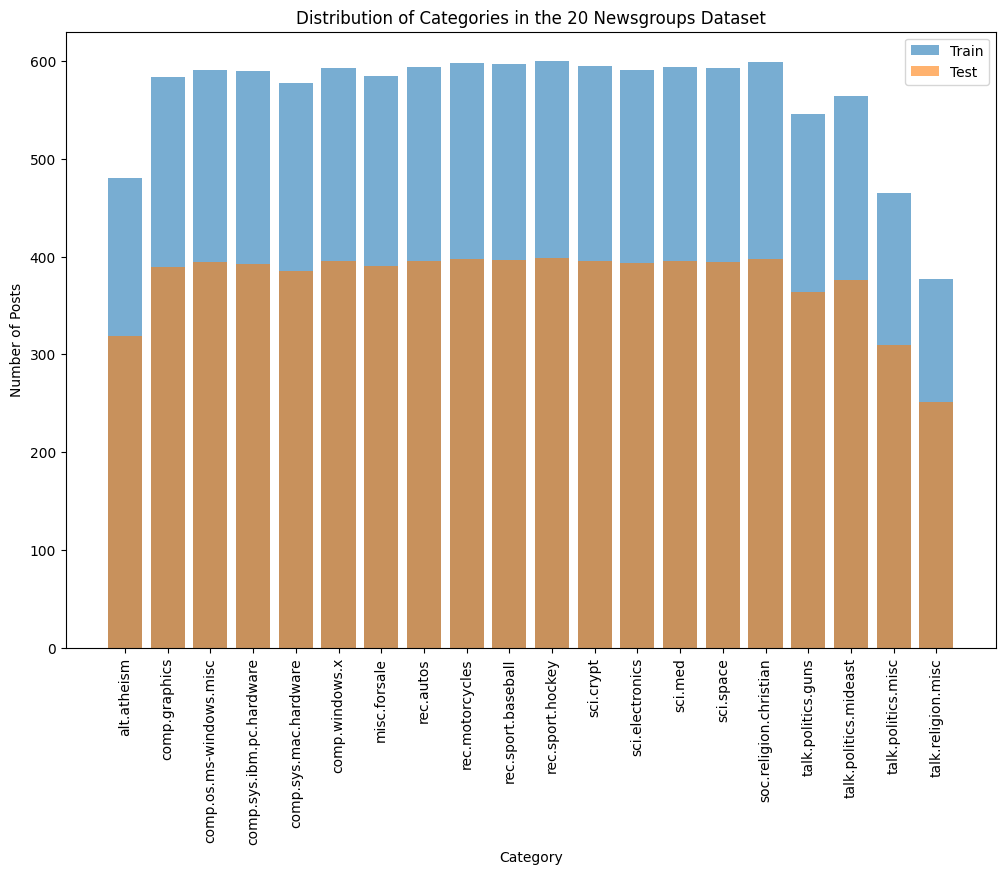

In [12]:
# Get category names
categories = newsgroups_train.target_names

# Count the number of posts in each category
train_category_counts = np.bincount(y_train)
test_category_counts = np.bincount(y_test)

# prinnt all the categories
for categroy in categories:
    print(categroy)
    
# Plot the distribution of categories
plt.figure(figsize=(12, 8))
plt.bar(categories, train_category_counts, alpha=0.6, label='Train')
plt.bar(categories, test_category_counts, alpha=0.6, label='Test')
plt.title('Distribution of Categories in the 20 Newsgroups Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## <b>Step 2</b>: Train and Evaluate Classification Models

I'll train Logistic Regression and SVM models and evaluate them.

In [5]:
# Train and evaluate Logistic Regression
logreg = LogisticRegression(max_iter=1000)
start_time = time.time()
logreg.fit(X_train_tfidf, y_train)
logreg_train_time = time.time() - start_time

# Measure the time taken to predict using Logistic Regression
start_time = time.time()
y_pred_logreg = logreg.predict(X_test_tfidf)
logreg_test_time = time.time() - start_time

# Evaluation metrics
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)
logreg_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)

# Train and evaluate SVM
svm = SVC(kernel='linear')
start_time = time.time()
svm.fit(X_train_tfidf, y_train)
svm_train_time = time.time() - start_time

# Measure the time taken to predict using SVM
start_time = time.time()
y_pred_svm = svm.predict(X_test_tfidf)
svm_test_time = time.time() - start_time

# Calculate SVM accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
# Generate SVM classification report
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
# Generate SVM confusion matrix
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)

## <b>Step 3</b>: Compare the Performance of the Models
Now, I'll compare the performance in terms of execution time, accuracy, precision, recall, F1-scores, and confusion matrices.

### Logistic Regression Results:

Logistic Regression Training Time: 4.0902 seconds
Logistic Regression Testing Time: 0.0090 seconds
Logistic Regression Accuracy: 0.8157
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       319
           1       0.69      0.77      0.73       389
           2       0.74      0.74      0.74       394
           3       0.69      0.70      0.69       392
           4       0.79      0.79      0.79       385
           5       0.84      0.74      0.79       395
           6       0.78      0.86      0.82       390
           7       0.87      0.88      0.88       396
           8       0.92      0.92      0.92       398
           9       0.88      0.91      0.89       397
          10       0.94      0.95      0.95       399
          11       0.95      0.89      0.92       396
          12       0.70      0.76      0.73       393
          13       0.86      0.84      0.85       396
          

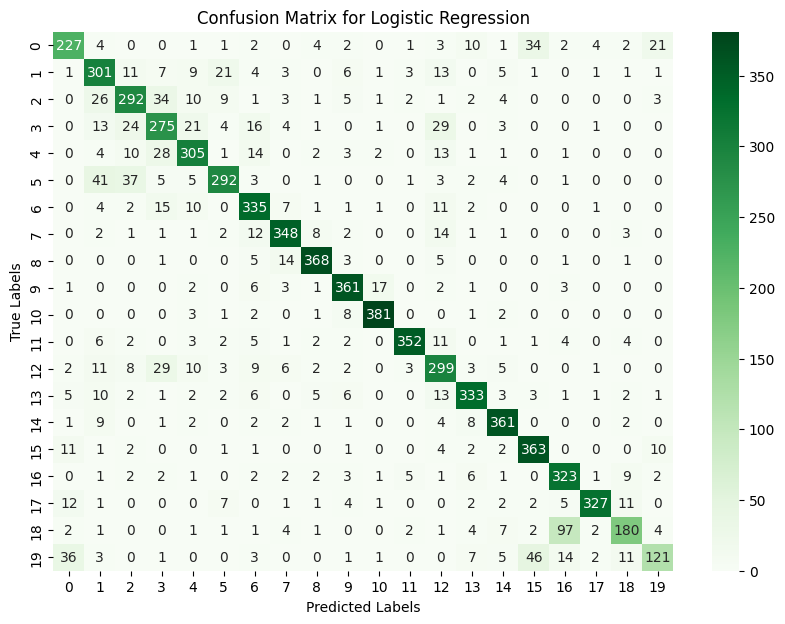

In [6]:
# Print Logistic Regression results
print(f'Logistic Regression Training Time: {logreg_train_time:.4f} seconds')
print(f'Logistic Regression Testing Time: {logreg_test_time:.4f} seconds')
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_logreg))
print('Logistic Regression Confusion Matrix:')
print(logreg_confusion_matrix)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(10, 7))
sns.heatmap(logreg_confusion_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Support Vector Machine Results:

SVM Training Time: 44.9695 seconds
SVM Testing Time: 29.0494 seconds
SVM Accuracy: 0.8112
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       319
           1       0.67      0.78      0.72       389
           2       0.75      0.73      0.74       394
           3       0.66      0.74      0.70       392
           4       0.80      0.77      0.79       385
           5       0.80      0.73      0.76       395
           6       0.78      0.87      0.82       390
           7       0.86      0.85      0.85       396
           8       0.94      0.91      0.92       398
           9       0.89      0.92      0.90       397
          10       0.97      0.94      0.96       399
          11       0.96      0.88      0.92       396
          12       0.66      0.76      0.70       393
          13       0.83      0.80      0.81       396
          14       0.90      0.89      0.90       394
          15      

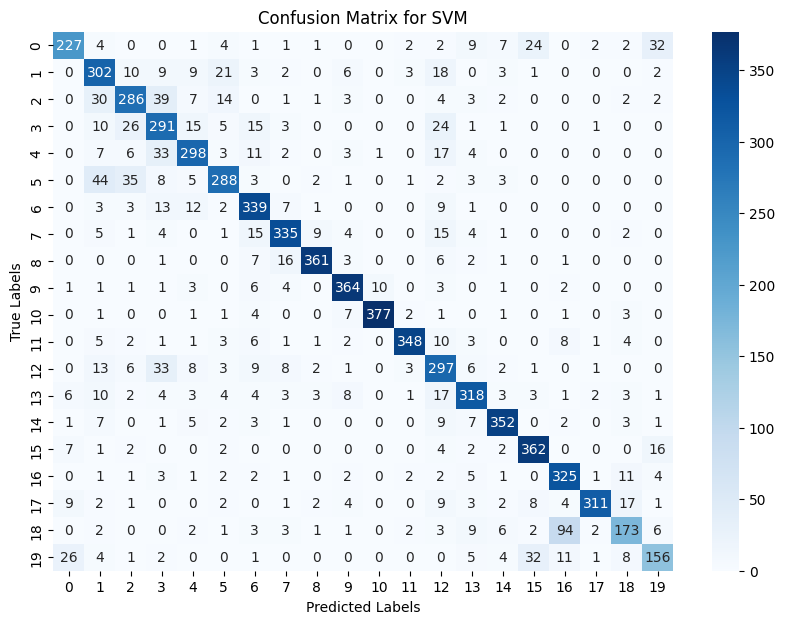

In [7]:
# Print SVM results
print(f'SVM Training Time: {svm_train_time:.4f} seconds')
print(f'SVM Testing Time: {svm_test_time:.4f} seconds')
print(f'SVM Accuracy: {svm_accuracy:.4f}')
print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))
print('SVM Confusion Matrix:')
print(svm_confusion_matrix)

# Plot confusion matrix for SVM
plt.figure(figsize=(10, 7))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## <b>Step 4</b>: Model Recommendation
Based on the evaluation metrics, I'll recommend the best model.

In [8]:
# Compare the performance of the models
print(f'Logistic Regression vs SVM:' + '\n')
print(f'Accuracy: {logreg_accuracy:.4f} vs {svm_accuracy:.4f}')
print(f'Training Time: {logreg_train_time:.4f} seconds vs {svm_train_time:.4f} seconds')
print(f'Testing Time: {logreg_test_time:.4f} seconds vs {svm_test_time:.4f} seconds' + '\n')

# Based on the comparison, recommend the best model
if logreg_accuracy > svm_accuracy:
    print('Logistic Regression is recommended due to higher accuracy.')
elif logreg_accuracy < svm_accuracy:
    print('SVM is recommended due to higher accuracy.')
else:
    print('Both models have similar accuracy. Further considerations on training and testing times, as well as other metrics, might be needed.')

Logistic Regression vs SVM:

Accuracy: 0.8157 vs 0.8112
Training Time: 4.0902 seconds vs 44.9695 seconds
Testing Time: 0.0090 seconds vs 29.0494 seconds

Logistic Regression is recommended due to higher accuracy.


## <b>Step 5</b>: Recommendations for Improving Model Performance

In [ ]:
# Suggestions for improving model performance
print('To improve model performance, we can consider the following steps:' + '\n')
print('1. Hyperparameter tuning: Use techniques like Grid Search or Random Search to find the best hyperparameters.')
print('2. Feature selection: Try different feature extraction methods or select the most important features.')
print('3. Data augmentation: Increase the training dataset size by including more samples or using data augmentation techniques.')
print('4. Ensemble methods: Combine the predictions of multiple models to improve accuracy.')
print('5. Deep learning: Experiment with deep learning models such as LSTM or BERT for better performance on text data.')

To improve model performance, we can consider the following steps:

1. Hyperparameter tuning: Use techniques like Grid Search or Random Search to find the best hyperparameters.
2. Feature selection: Try different feature extraction methods or select the most important features.
3. Data augmentation: Increase the training dataset size by including more samples or using data augmentation techniques.
4. Ensemble methods: Combine the predictions of multiple models to improve accuracy.
5. Deep learning: Experiment with deep learning models such as LSTM or BERT for better performance on text data.


### Let's test the winning model and make a prediction.

In [10]:
# Define a sample text for prediction
sample_text = ["I recently upgraded my computer to a new graphics card and now my system crashes when I try to run certain applications. Has anyone else experienced this issue?"]

# Vectorize the sample text
sample_text_tfidf = vectorizer.transform(sample_text)

# Make a prediction (loreg = logistic regression variable previously defined)
predicted_category = logreg.predict(sample_text_tfidf)

# Map the predicted category to the category name
predicted_category_name = newsgroups_train.target_names[predicted_category[0]]

# Print the predicted category based on the sample text
print(f"Predicted Category: {predicted_category_name}")

Predicted Category: comp.graphics


## Conclusions only for the best model

### Logistic Regression:
- <b>Training Time</b>: 4.09 seconds to train on the training dataset. This is relatively fast, indicating that Logistic Regression is efficient in training even on a reasonably large dataset like the 20 newsgroups dataset.
- <b>Testing Time</b>: 0.0090 seconds to make predictions on the test dataset, which is very quick, highlighting the efficiency of Logistic Regression in real-time predictions.
- <b>Accuracy</b>: The model achieved an accuracy of approximately 81.57%. This means that about 81.57% of the predictions made by the model were correct.
- <b>Classification Report</b>: The classification report provides detailed metrics for each class. Here's a breakdown of precision, recall, and F1-score:
    1. <b>Precision</b>: Indicates the percentage of positive identifications that were actually correct.
    2. <b>Recall</b>: Indicates the percentage of actual positives that were correctly identified.
    3. <b>F1-score</b>: The harmonic mean of precision and recall, providing a balance between the two.
- <b>High Performing Classes</b>: Classes like 10 (precision: 0.94, recall: 0.95), 8 (precision: 0.92, recall: 0.92), and 17 (precision: 0.96, recall: 0.87) show strong performance with high precision, recall, and F1-scores.
- <b>Lower Performing Classes</b>: Class 1 (precision: 0.69, recall: 0.77) and class 18 (precision: 0.80, recall: 0.58) show relatively lower performance, indicating potential areas for improvement.

<b>Note:</b> When I talk about classes, I am referring to each category of the newsgroups, starting with category #1 (class) up to #20. Example:

- <b>Class 1:</b> alt.atheism
- <b>Class 2: </b>comp.graphics
- <b>Class 3: </b>comp.os.ms-windows.misc 
- ...... up to #20

<p>The model evaluates the accuracy of each class based on the input text provided by the user. This tells us in which classes the model is doing a better or worse job.</p>